In [1]:
import sys

install_pgkyl = False
if install_pgkyl:
    print("pull postgkyl repository")
    !git -C ~/postgkyl/ pull
    # install postgkyl (required by pygkyl)
    !{sys.executable} -m pip install ~/postgkyl/ > ~/personal_gkyl_scripts/pygkyl/postgkyl_install.log

install_pygkyl = True
if install_pygkyl:
    print("pull personal_gkyl_scripts repository")
    !git -C ~/personal_gkyl_scripts/ pull
    # Clean the pygkyl build and egg-info directories
    !rm -rf ~/personal_gkyl_scripts/pygkyl/pygkyl.egg-info
    !rm -rf ~/personal_gkyl_scripts/pygkyl/build
    # Install the pygkyl package
    !{sys.executable} -m pip install ~/personal_gkyl_scripts/pygkyl > ~/personal_gkyl_scripts/pygkyl/pygkyl_install.log
# Import the pygkyl package
import pygkyl

pull personal_gkyl_scripts repository
Already up to date.


In [2]:
simdir = '/Users/ahoffmann/gyacomo/simulations/problem_01/'
fileprefix = 'outputs_00.h5'
simulation = pygkyl.simulation_configs.import_config( 'gyacomo', simdir, fileprefix)

Ni00 shape:  (64, 48, 1)
grids shape:  (65,)


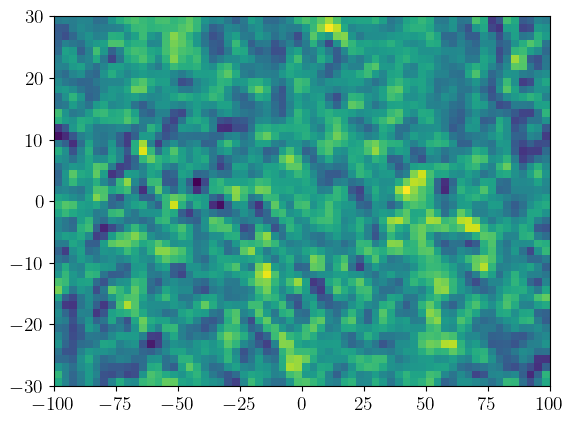

In [3]:
grids, tf, Ni00 = simulation.gyac.load_data('Ni00',100.0, xyz=True)
import matplotlib.pyplot as plt
import numpy as np
print("Ni00 shape: ", Ni00.shape)
print("grids shape: ", grids[0].shape)

plt.figure()
x_mg, y_mg = np.meshgrid(grids[0], grids[1], indexing='ij')
plt.pcolormesh(x_mg, y_mg, Ni00[:,:,0])

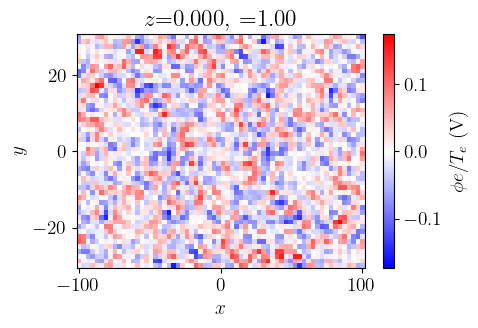

In [ ]:
cut_dir = 'xy'
cut_coord = 0.0
time_frame = 0
fieldname = 'phi'
pygkyl.plot_utils.plot_2D_cut(simulation, cut_dir, cut_coord, time_frame, fieldname)